In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

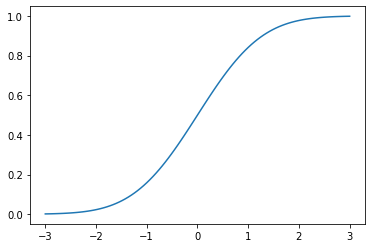

In [2]:
def phi(x):
    if (x < 0):
        return 1.0 - phi(-x)
    y = 1.0 / (1.0 + 0.33267*x)
    a1 = 0.4361836
    a2 = -0.1201676
    a3 = 0.9372980
    r = 1.0 - (1.0/(np.sqrt(2*np.pi))) * (a1*y + a2*y*y + a3*y*y*y)* np.exp(-x*x/2.0)
    return r
fig = plt.figure()
X = np.linspace(-3, 3, 100)
plt.plot(X, [phi(x) for x in X])

In [3]:
import math
def stock_price(S0, mu, std):
    S1 = S0*np.exp(np.random.normal(loc=mu, scale=std, size=1))
    return S1
def stock_price_path(S0, mu, std):
    S1 = S0
    list_S = [S1]
    for t in range(100):
        S2 = stock_price(S1, mu, std)
        list_S.append(S2)
        S1 = S2
    return list_S
if False:
    S = stock_price_path(1000, mu, std)
    fig = plt.figure()
    plt.plot(S)
def bi(i, mu, K, Pm, std):
    return (i*mu - np.log(K/Pm))/(std * np.sqrt(i))
def exercise_policy(Pm, K, m, mu, std):
    alpha = mu + std*std/2.0
    exercise = False
    if Pm > K:
        exercise = True
        for i in range(1, m + 1):
            b = bi(i, mu, K, Pm, std)
            if Pm > K + Pm*np.exp(i*alpha)*phi(std*np.sqrt(i) + b) - K*phi(b):
                pass
            else:
                exercise = False
                break
    return exercise
def simulate(Pm, K, m, mu, std):
    while m >= 0:
        do_exercise = exercise_policy(Pm, K, m, mu, std)
        if do_exercise:
            return Pm - K
        else:
            Pm = Pm*math.exp(np.random.normal(loc=mu, scale=std))
            m = m - 1
    return 0.0

In [4]:
# https://brilliant.org/wiki/black-scholes-merton/
def black_scholes(S0, K, T, t, r, std):
    Tmt = (T-t)/365.0
    den = std * np.sqrt(Tmt)
    d1 = (np.log(S0/K) + (r + std*std/2.0)*(Tmt))/den
    d2 = (np.log(S0/K) + (r - std*std/2.0)*(Tmt))/den
    return S0*phi(d1) - K*math.exp(-r*(Tmt))*phi(d2)
print(black_scholes(50, 45, 80, 0, 0.02, 0.3))
print(black_scholes(100, 100, 20, 0, 0.0, 0.3*np.sqrt(365)))

6.021587537743542
49.76482785092668


In [5]:
value = []
for i in range(10000):
    v = simulate(100.0, 100, 20, -0.05, 0.3)
    value.append(v)
print(np.mean(value), np.std(value))

45.09091554152147 84.70275148652513
